# Breast Cancer Prediction

---


**Description**

> Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.
The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous).
Data Source : https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

**Attribute Information : **
1. ID number
2. Diagnosis (M = malignant, B = benign)
3. Ten real-valued features are computed for each cell nucleus:

    1. radius (mean of distances from center to points on the perimeter)
    2. texture (standard deviation of gray-scale values)
    3. perimeter
    4. area
    5. smoothness (local variation in radius lengths)
    6. compactness (perimeter^2 / area - 1.0)
    7. concavity (severity of concave portions of the contour)
    8. concave points (number of concave portions of the contour)
    9. symmetry
    10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

# Importing Modules

In [45]:
# importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Reading Data

In [46]:
data = pd.read_csv("/content/drive/MyDrive/breast-cancer.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Preparing Data

In [47]:
data.drop("id" , inplace = True , axis = 1)
data["diagnosis"] = data["diagnosis"].map({"M":1,"B":0})

In [13]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


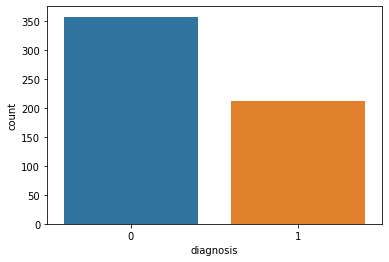

In [14]:
sns.countplot(data.diagnosis)

**Data is almost balanced**

# Exploratory data analysis

In [20]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [41]:
dataM=data[data['diagnosis'] ==1]
dataB=data[data['diagnosis'] ==0]
features_mean=list(data.columns[1:11])
features_se = list(data.columns[11:21])
features_worst = list(data.columns[21:31])

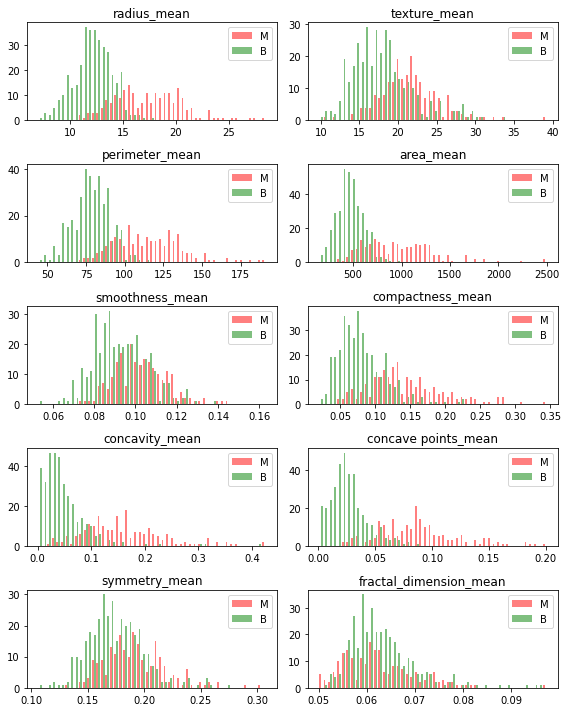

In [40]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dataM[features_mean[idx]],dataB[features_mean[idx]]],
            bins=np.arange(min(data[features_mean[idx]]),
                           max(data[features_mean[idx]]) + binwidth, binwidth) ,
             alpha=0.5,label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()




*   It can be observed that Larger the mean values of radius" , concave points" , concavity" , "compactness, area and perimeter" shows correlation with Malignant tumors.
So these features can be used for classification. 
*   On the other hand mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


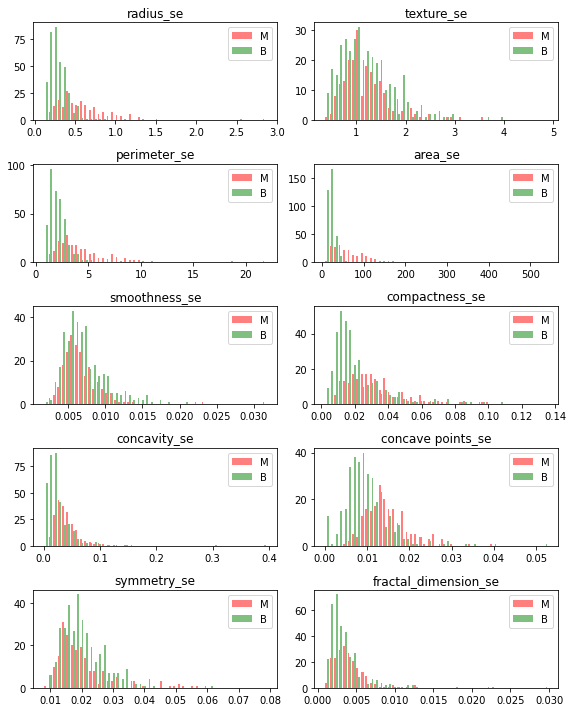

In [42]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_se[idx]]) - min(data[features_se[idx]]))/50
    ax.hist([dataM[features_se[idx]],dataB[features_se[idx]]],
            bins=np.arange(min(data[features_se[idx]]),
                           max(data[features_se[idx]]) + binwidth, binwidth) ,
             alpha=0.5,label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_se[idx])
plt.tight_layout()
plt.show()


* It can be observed that Larger the standard error values of radius" , concave points", "compactness, area and perimeter" shows correlation with Malignant tumors.
So these features can be used for classification. 

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


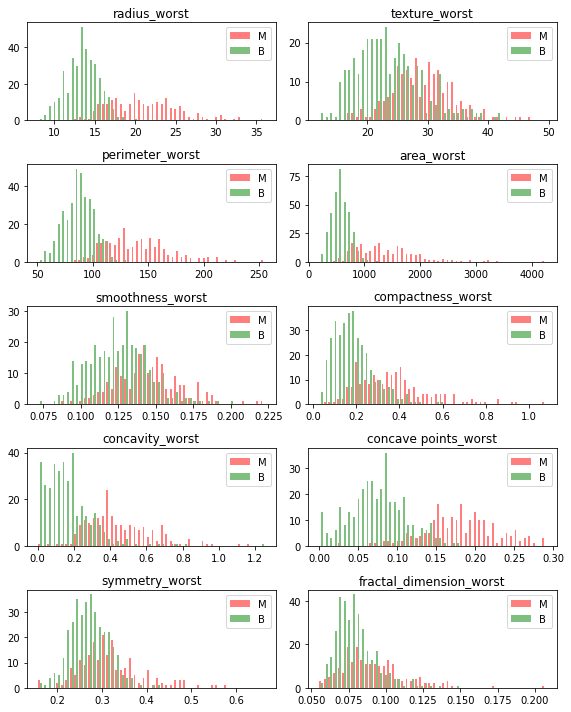

In [43]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_worst[idx]]) - min(data[features_worst[idx]]))/50
    ax.hist([dataM[features_worst[idx]],dataB[features_worst[idx]]],
            bins=np.arange(min(data[features_worst[idx]]),
                           max(data[features_worst[idx]]) + binwidth, binwidth) ,
             alpha=0.5,label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_worst[idx])
plt.tight_layout()
plt.show()

*  Similar to means values, It can be observed that Larger the worst values of radius" , concave points" , concavity" , "compactness, area and perimeter" shows correlation with Malignant tumors.
So these features can be used for classification. 
*   On the other hand worst values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other


In [52]:
# important features
important_feats =['radius_mean','perimeter_mean','area_mean','compactness_mean',"concavity_mean",'concave points_mean',
                  'radius_se','perimeter_se','area_se','compactness_se','concave points_se',
                  'radius_worst','perimeter_worst','area_worst','compactness_worst',"concavity_mean",'concave points_worst']


# Data Preprocessing and Classificatom

In [56]:
data_imp = data[important_feats]
target = data["diagnosis"]

In [57]:
data_imp


,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,compactness_se,concave points_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_mean,concave points_worst
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,0.04904,0.01587,25.380,184.60,2019.0,0.66560,0.30010,0.2654
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,0.01308,0.01340,24.990,158.80,1956.0,0.18660,0.08690,0.1860
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,0.04006,0.02058,23.570,152.50,1709.0,0.42450,0.19740,0.2430
3,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,0.07458,0.01867,14.910,98.87,567.7,0.86630,0.24140,0.2575
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,0.02461,0.01885,22.540,152.20,1575.0,0.20500,0.19800,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,0.02891,0.02454,25.450,166.10,2027.0,0.21130,0.24390,0.2216
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,0.02423,0.01678,23.690,155.00,1731.0,0.19220,0.14400,0.1628
566,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,0.03731,0.01557,18.980,126.70,1124.0,0.30940,0.09251,0.1418
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,0.06158,0.01664,25.740,184.60,1821.0,0.86810,0.35140,0.2650


In [98]:
# normalising data
x = MinMaxScaler().fit_transform(data_imp)
y = np.array(target)

In [105]:
# splitting data
x_train , x_test , y_train , y_test = train_test_split(x,y, train_size = 0.2)

# Rnadom Forest Classifier

In [106]:
clf = RandomForestClassifier() 
clf.fit(x_train , y_train)

RandomForestClassifier()

In [107]:
preds_clf = clf.predict(x_test)

In [108]:
print(classification_report(y_test,preds_clf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       290
           1       0.92      0.92      0.92       166

    accuracy                           0.94       456
   macro avg       0.94      0.94      0.94       456
weighted avg       0.94      0.94      0.94       456



In [109]:
print(confusion_matrix(y_test , preds_clf))

[[277  13]
 [ 14 152]]


# SVM

In [110]:
model = SVC()
model.fit(x_train , y_train)
preds = model.predict(x_test)

In [111]:
print(confusion_matrix(y_test , preds))

[[285   5]
 [ 25 141]]


In [112]:
print(classification_report(y_test , preds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       290
           1       0.97      0.85      0.90       166

    accuracy                           0.93       456
   macro avg       0.94      0.92      0.93       456
weighted avg       0.94      0.93      0.93       456



# Conclusion


Random Forest gave better accuracy and precision than SVM.


